## Observations and Insights 

In [485]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st



# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
mouse_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_merge_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [486]:
# Checking the number of mice.
mouse_count = mouse_merge_df["Mouse ID"].count()
mouse_count


1893

In [487]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

x = mouse_merge_df.columns
x                         
                                    

# Me" create a new list of duplicate IDs and Timepoint values




mouse_merge_dupfree_df = mouse_merge_df.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep='last')
                         #cleaned_df=df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='last')

mouse_merge_dupfree_df
#print(len(mouse_merge_dupfree_df ))

        






,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [488]:
#get tumor vol stats
mouse_grp_drug_df = mouse_merge_dupfree_df.groupby(["Drug Regimen"])
tumor_vol_mean = mouse_grp_drug_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_grp_drug_df["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_grp_drug_df["Tumor Volume (mm3)"].var()
tumor_vol_std = mouse_grp_drug_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_grp_drug_df["Tumor Volume (mm3)"].sem()
print(tumor_vol_std)

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.574208
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64


In [489]:




#get tumor volume
mouse_grp_df = mouse_merge_dupfree_df.groupby(["Drug Regimen", "Timepoint", "Tumor Volume (mm3)"])

#get just drug, timepoint, and tumor volumn data
#tumor_vol_df = mouse_merge_dupfree_df.loc[:, ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)" ]].head(50)
  
#mouse_grp_df = mouse_grp_df.loc[:, ["Drug Regimen", "Timepoint", "Tumor Volume (mm3)" ]].head(50)
    
#get tumor volume average
ave_tumor_vol_df = mouse_grp_df.mean()


ave_tumor_vol_df= ave_tumor_vol_df.reset_index()

ave_tumor_vol_df.head(50)

tumor_vol_SEM_df = mouse_grp_df.sem()
tumor_vol_SEM_df = pd.DataFrame(tumor_vol_SEM_df).reset_index()
tumor_vol_SEM_df.head(10)


,Drug Regimen,Timepoint,Tumor Volume (mm3),Age_months,Metastatic Sites,Mouse ID,Sex,Weight (g)
0,Capomulin,0,45.000000,1.570011,0.0,NaN,NaN,0.57248
1,Capomulin,5,38.796474,NaN,NaN,NaN,NaN,NaN
2,Capomulin,5,39.202129,NaN,NaN,NaN,NaN,NaN
3,Capomulin,5,41.019913,NaN,NaN,NaN,NaN,NaN
4,Capomulin,5,41.408591,NaN,NaN,NaN,NaN,NaN
5,Capomulin,5,41.534097,NaN,NaN,NaN,NaN,NaN
6,Capomulin,5,42.261665,NaN,NaN,NaN,NaN,NaN
7,Capomulin,5,43.180977,NaN,NaN,NaN,NaN,NaN
8,Capomulin,5,43.878496,NaN,NaN,NaN,NaN,NaN
9,Capomulin,5,44.022752,NaN,NaN,NaN,NaN,NaN


In [490]:
# Optional: Get all the data for the duplicate mouse ID. 

mouse_merge_by_ID_df = mouse_merge_df.groupby(['Mouse ID'])

mouse_merge_by_ID_df.head(20)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [503]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_merge_df = mouse_merge_dupfree_df.drop_duplicates(subset=["Mouse ID"], keep='last')
clean_mouse_merge_df.head(10)

unique_mouse_df = clean_mouse_merge_df["Mouse ID"].unique()
unique_mouse_df

array(['k403', 's185', 'x401', 'm601', 'g791', 's508', 'f966', 'm546',
       'z578', 'j913', 'u364', 'n364', 'y793', 'r554', 'm957', 'c758',
       't565', 'a644', 'i177', 'j989', 'i738', 'a520', 'w914', 'r811',
       'g288', 'i334', 'q610', 'd251', 'l897', 'c458', 'b742', 'b128',
       'j246', 'a411', 'j119', 'w150', 'v923', 'g316', 's710', 'l509',
       'r944', 'e662', 'u196', 'q597', 'a444', 'i557', 'r921', 'w678',
       'y449', 'a203', 'a251', 'a262', 'a275', 'a366', 'a401', 'a457',
       'a492', 'a577', 'a685', 'a699', 'a788', 'a818', 'a897', 'a963',
       'b313', 'b447', 'b487', 'b559', 'b759', 'b879', 'c139', 'c264',
       'c282', 'c302', 'c326', 'c402', 'c559', 'c580', 'c757', 'c766',
       'c819', 'c832', 'c895', 'c927', 'd133', 'd164', 'd474', 'e213',
       'e227', 'e291', 'e476', 'e584', 'f129', 'f234', 'f278', 'f345',
       'f394', 'f436', 'f545', 'f932', 'f993', 'g107', 'g296', 'g497',
       'g558', 'g570', 'g867', 'g989', 'h246', 'h333', 'h428', 'h531',
      

In [492]:
unique_mice = clean_mouse_merge_df.drop_duplicates(subset=['Mouse ID', 'Drug Regimen']).copy()
len(unique_mice) #249 unique mice within all Drug Regimens
unique_mice.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [200]:
#grp=unique_mice.groupby(['Drug Regimen']).count()
grp=unique_mice.groupby(['Drug Regimen', 'Sex']).count()
print(grp)


                     Mouse ID  Age_months  Weight (g)  Timepoint  \
Drug Regimen Sex                                                   
Capomulin    Female        13          13          13         13   
             Male          12          12          12         12   
Ceftamin     Female        13          13          13         13   
             Male          12          12          12         12   
Infubinol    Female        12          12          12         12   
             Male          13          13          13         13   
Ketapril     Female         9           9           9          9   
             Male          16          16          16         16   
Naftisol     Female        13          13          13         13   
             Male          12          12          12         12   
Placebo      Female        13          13          13         13   
             Male          12          12          12         12   
Propriva     Female        12          12       

In [493]:
# Checking the number of mice in the clean DataFrame.
unique_mice.count()

Mouse ID              249
Drug Regimen          249
Sex                   249
Age_months            249
Weight (g)            249
Timepoint             249
Tumor Volume (mm3)    249
Metastatic Sites      249
dtype: int64

## Summary Statistics

In [494]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
#and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of 
#each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the #tumor volume. 
# Assemble the resulting series into a single summary dataframe.

                       #****get tumor vol stats*****

#group duplicate free merge by drug type
mouse_grp_drug_df = mouse_merge_dupfree_df.groupby(["Drug Regimen"])

#calculate the various stats for tumor volume
tumor_vol_mean = mouse_grp_drug_df["Tumor Volume (mm3)"].mean()
tumor_vol_median = mouse_grp_drug_df["Tumor Volume (mm3)"].median()
tumor_vol_var = mouse_grp_drug_df["Tumor Volume (mm3)"].var()
tumor_vol_std = mouse_grp_drug_df["Tumor Volume (mm3)"].std()
tumor_vol_sem = mouse_grp_drug_df["Tumor Volume (mm3)"].sem()


#add stats to a new dataframe

tumor_vol_stats_df = pd.DataFrame({'Tumor Vol Mean': tumor_vol_mean, 'Tumor Vol Median': tumor_vol_median,
                                  'Tumor Vol Variance': tumor_vol_var, 'Tumor Vol Std': tumor_vol_std,
                                   'Tumor Vol SEM': tumor_vol_sem})

#print summary dataframe
tumor_vol_stats_df



,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [495]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mouse_grp_drug_by_tumor_vol_df= mouse_grp_drug_df["Tumor Volume (mm3)"]

# Using the aggregation method, produce the same summary statistics in a single line

#this is a time saver
tumor_vol_stats_agg_df = mouse_grp_drug_by_tumor_vol_df.aggregate(['mean', 'median', 'var', 'std', 'sem'])

tumor_vol_stats_agg_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

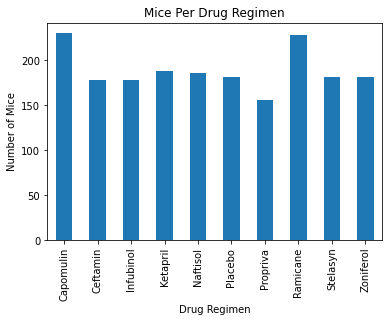

In [444]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
drug_regimen_count = mouse_grp_drug_df['Mouse ID'].count()
drug_regimen_count.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.title("Mice Per Drug Regimen")
plt.show()


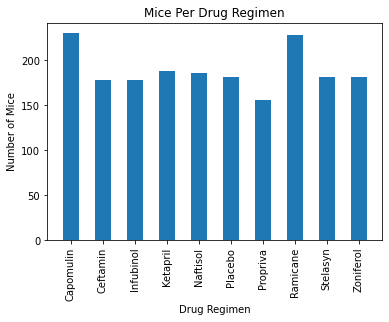

In [480]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#get drug names from drug_regimen_count
#drug_regimen_list = drug_regimen_count.index.to_list
drug_regimen_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']


# this didn't work for the list creation.   
#drug_regimen_list =  drug_regimen_count[drug_regimen_count['Drug Regimen'] =='Capomulin'.index.tolist()
                                     
# plot chart
plt.bar(drug_regimen_list, drug_regimen_count, width = .5)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.title("Mice Per Drug Regimen")
plt.xticks(rotation ='vertical')
plt.show()






Text(0, 0.5, 'Gender Distribution')

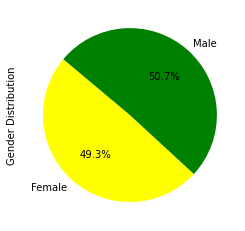

In [633]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#group mouse dup free data by gender
mouse_merge_dupfree_by_gender_df = mouse_merge_dupfree_df.groupby(["Sex"])


#break out mice by gender
#gender_totals = mouse_merge_dupfree_by_gender_df['Mouse Id'].count()
#print(gender_totals)
#genders = gender_totals.index.to_list

#print('Genders')
#print(genders)


# #plot pie chart




plot = gender_totals.plot.pie(subplots=True, figsize=(10, 4), colors =["yellow","green"], autopct='%1.1f%%', startangle=140)
plt.ylabel('Gender Distribution')

#gender_totals.plot.pie(figures=(3,3))

Text(0, 0.5, 'Gender Distribution')

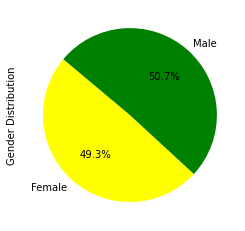

In [634]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(gender_totals, explode=[0,0], labels=["Female","Male"], colors=["yellow","green"],
        autopct="%1.1f%%", startangle=140)
plt.ylabel('Gender Distribution')


## Quartiles, Outliers and Boxplots

In [642]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

#add drugs to list
drug_list=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#group mouse data by mouse and get the last (final) tumor volume value per mouse
drug_tumor_vol_last_df = mouse_merge_dupfree_df.groupby("Mouse ID").last()["Tumor Volume (mm3)"]

#group mouse data by mouse and get the drug type associated with the last record per mouse
tumor_vol_last_drug_df = mouse_merge_dupfree_df.groupby("Mouse ID").last()["Drug Regimen"]


#create dataframe for the gathered data
final_tumor_vol_df = pd.DataFrame({"Final Tumor Volume":drug_tumor_vol_last_df,"Drug Regimen":tumor_vol_last_drug_df})



final_tumor_vol_df


,Final Tumor Volume,Drug Regimen
Mouse ID,,
a203,67.973419,Infubinol
a251,65.525743,Infubinol
a262,70.717621,Placebo
a275,62.999356,Ceftamin
a366,63.440686,Stelasyn
...,...,...
z435,48.710661,Propriva
z578,30.638696,Ramicane
z581,62.754451,Infubinol


In [643]:

final_tumor_vol_pivot_df = final_tumor_vol_df.pivot_table("Final Tumor Volume",
                                                        ["Mouse ID"], "Drug Regimen")[["Capomulin", "Ramicane", "Infubinol","Ceftamin"]]


final_tumor_vol_pivot_df = final_tumor_vol_pivot_df.fillna(0)
final_tumor_vol_pivot_df.head(50)



Drug Regimen,Capomulin,Ramicane,Infubinol,Ceftamin
Mouse ID,,,,
a203,0.000000,0.000000,67.973419,0.000000
a251,0.000000,0.000000,65.525743,0.000000
a262,0.000000,0.000000,0.000000,0.000000
a275,0.000000,0.000000,0.000000,62.999356
a366,0.000000,0.000000,0.000000,0.000000
a401,0.000000,0.000000,0.000000,0.000000
a411,0.000000,38.407618,0.000000,0.000000
a444,0.000000,43.047543,0.000000,0.000000
a457,0.000000,0.000000,0.000000,0.000000


In [645]:

for drug in drug_list:
    quartiles = final_tumor_vol_pivot_df[drug].quantile([0.25,0.5,0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
       
    print(f"{drug}  IQR data is:")
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")

    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    print(f"-----------------------------------------------")  
    

Capomulin  IQR data is:
The lower quartile of Capomulin is: 0.0
The upper quartile of Capomulin is: 0.0
The interquartile range of Capomulin is: 0.0
The the median of Capomulin is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.
-----------------------------------------------
Ramicane  IQR data is:
The lower quartile of Ramicane is: 0.0
The upper quartile of Ramicane is: 0.0
The interquartile range of Ramicane is: 0.0
The the median of Ramicane is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.
-----------------------------------------------
Infubinol  IQR data is:
The lower quartile of Infubinol is: 0.0
The upper quartile of Infubinol is: 0.0
The interquartile range of Infubinol is: 0.0
The the median of Infubinol is: 0.0 
Values below 0.0 could be outliers.
Values above 0.0 could be outliers.
-----------------------------------------------
Ceftamin  IQR data is:
The lower quartile of Ceftamin is: 0.0
The upper quartile of Cef

In [553]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds
tumor_vol_plot_data = []

capomulin_df = mouse_merge_dupfree_df.loc[(mouse_merge_dupfree_df["Drug Regimen"] == "Capomulin"),:]

#for drug in drug_list:
quartiles = capomulin_df.quantile([0.25,0.5,0.75])
    #print(drug)
    #print(quartiles)
    #print(tumor_vol_plot_data)
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
    #tumor_vol_plot_data.append(final_tumor_vol_df["Drug Regimen"])
    #tumor_vol_plot_data.append(list(final_tumor_vol_df[drug]))
    #tumor_vol_plot_data.append()

print(f"{drug}  IQR data is:")
print(f"The lower quartile of {drug} is: {lowerq}")
print(f"The upper quartile of {drug} is: {upperq}")
print(f"The interquartile range of {drug} is: {iqr}")
print(f"The the median of {drug} is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print(f"-----------------------------------------------")    

    

KeyError: 0.25

In [545]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data_list = {'X': '49', '60', '86', 'Y': '34','23', '9', '60', '86','34','23'}

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final Tumor Volume by Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Tumor Vol (mm3)')
ax.boxplot(final_tumor_vol_pivot_df,notch=0,sym='gD')
plt.xticks([1,2,3,4],final_tumor_vol_pivot_df)

SyntaxError: invalid syntax (<ipython-input-545-7bf9a5580b9c>, line 2)

## Line and Scatter Plots

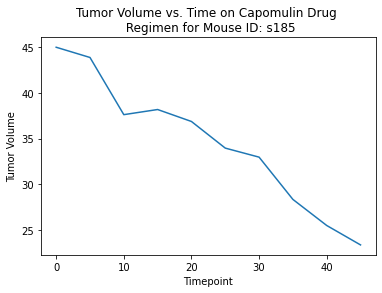

In [436]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#get data just for Capomulin
capomulin_df = mouse_merge_dupfree_df.loc[(mouse_merge_dupfree_df["Drug Regimen"] == "Capomulin"),:]

#get data for just as single mouse
capomulin_single_mouse_df = capomulin_df.loc[(capomulin_df["Mouse ID"] == "s185"),:]

#assign variables for plot data
timepoints = capomulin__single_mouse_df["Timepoint"]
tumor_vol = capomulin__single_mouse_df["Tumor Volume (mm3)"]

#create the plot for the tumor volume
volume_time_line, = plt.plot(timepoints, tumor_vol)

plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Tumor Volume vs. Time on Capomulin Drug \n Regimen for Mouse ID: s185')
plt.show()



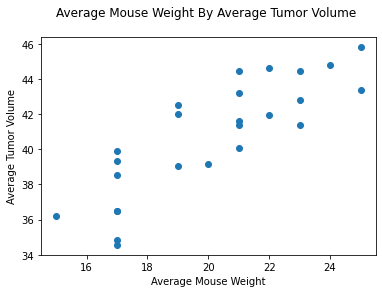

In [418]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#setup variables plotting
ave_mouse_weight = capomulin_df.groupby(capomulin_df["Mouse ID"])["Weight (g)"].mean()
ave_tumor_vol = capomulin_df.groupby(capomulin_df["Mouse ID"])["Tumor Volume (mm3)"].mean()

#generate scatter plot
plt.title('Average Mouse Weight By Average Tumor Volume \n')
plt.scatter(ave_mouse_weight,ave_tumor_vol)
plt.xlabel("Average Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()



## Correlation and Regression



                                     The r-squared is: 0.7088568047708717




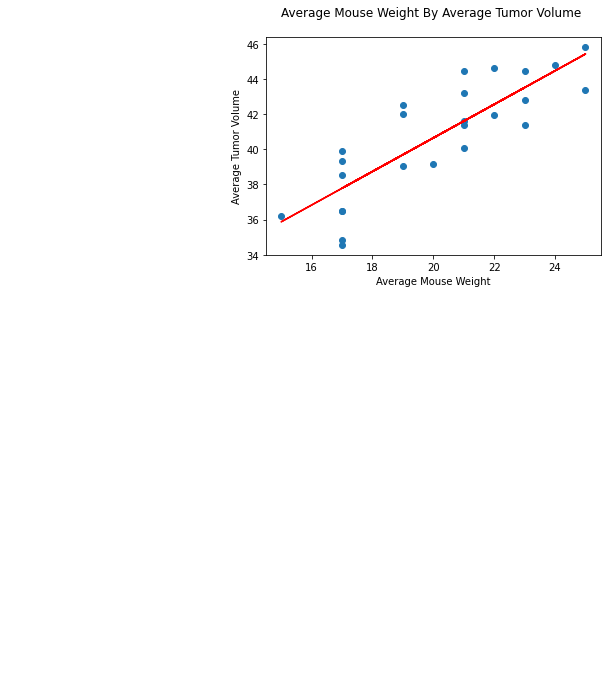

In [458]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#calculate the correlation coefficent and linear regression model
x_values = ave_mouse_weight
y_values = ave_tumor_vol
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot the graph and print the r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=16,color="red")
plt.title('Average Mouse Weight By Average Tumor Volume \n')
plt.xlabel('Average Mouse Weight')
plt.ylabel('Average Tumor Volume')
print(f'\n')
print(f"                                     The r-squared is: {rvalue**2}")
print(f'\n')
plt.show()
